# Hungarian algorithm in Python
The purpose of this exercise is to get familiar with solver as presented in __[https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html)__

In [1]:
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

Time taken to solve: 0.0009999275207519531 sec


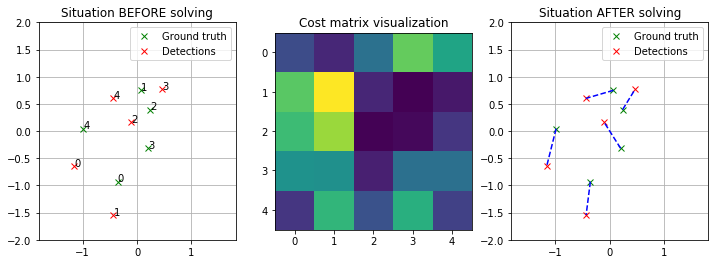

True correspondences:
[0 1 2 3 4]
[4 0 3 2 1]
Inferred correspondences:
[1 4 3 2 0]
[0 1 2 3 4]


In [2]:
N = 5

# Create ground-truth (GT) and detections by introducing random gaussian noise
gt = np.random.uniform(-1,1,(N,2))
dets_orig = gt + np.random.normal(0,0.5,(N,2))

# Let's shuffle the detections
idx = np.argsort(np.random.uniform(0,1,(N,)))
dets = dets_orig[idx,]

# Let's plot the situation BEFORE any solving
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot( gt[:,0], gt[:,1], 'gx' )
plt.plot( dets[:,0], dets[:,1], 'rx' )
for i in range(0,N):
    plt.text( gt[i,0], gt[i,1], '{}'.format(i) )
    plt.text( dets[i,0], dets[i,1], '{}'.format(i) )
plt.legend(['Ground truth', 'Detections'])
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.grid()
plt.title('Situation BEFORE solving')




# Let's create the cost matrix (row index is the GT and col index is the Detection)
C = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        # We are just using L2 norm for the cost
        cost = np.linalg.norm( gt[i,]-dets[j,] )
        C[i,j] = cost

# Let's visualize the cost matrix
plt.subplot(1,3,2)
plt.imshow(C)
plt.title('Cost matrix visualization')

# ... and solve the problem using "linear_sum_assignment" function given the cost matrix C
start = time.time()
row_ind, col_ind = linear_sum_assignment(C)
stop = time.time()
print('Time taken to solve: {} sec'.format(stop-start))

# Let's plot the output
plt.subplot(1,3,3)
plt.plot( gt[row_ind,0], gt[row_ind,1], 'gx' )
plt.plot( dets[col_ind,0], dets[col_ind,1], 'rx' )
for i in range(0,N):
    plt.plot( [ gt[row_ind[i],0], dets[col_ind[i],0] ], [ gt[row_ind[i],1], dets[col_ind[i],1] ], 'b--' )
plt.legend(['Ground truth', 'Detections'])
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.grid()
plt.title('Situation AFTER solving')
plt.show()

# And let's visualize the index-based correspondences
print('True correspondences:')
print(np.array(range(N)))
print(idx)

print('Inferred correspondences:')
print(col_ind)
print(row_ind)